In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_dir='/content/drive/MyDrive/Homework 2-20250321T023248Z-001/Homework 2/Foods'
img_width, img_height=128,128
batch_size=32
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width, img_height,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(5,activation='softmax')
])

Found 500 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=178)

Epoch 1/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.8719 - loss: 0.3426
Epoch 2/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.8972 - loss: 0.2410
Epoch 3/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 428ms/step - accuracy: 0.9024 - loss: 0.2533
Epoch 4/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 343ms/step - accuracy: 0.8987 - loss: 0.2613
Epoch 5/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.9043 - loss: 0.2493
Epoch 6/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.8955 - loss: 0.2642
Epoch 7/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 419ms/step - accuracy: 0.9138 - loss: 0.2387
Epoch 8/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.9079 - loss: 0.2541
Epoch 9/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.9114 - loss: 0.2660
Epoch 10/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.9088 - loss: 0.2353
Epoch 11/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - accuracy: 0.9249 - loss: 0.2302
Epoch 12/178
16/16 ━━━━━━━━━━━━━━━━━━━━ 

In [5]:
model.save('foods_cnn.keras')

In [7]:
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('foods_cnn.keras')

# Check the model summary to verify it loaded correctly
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,857 (37.83 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,572 (25.22 MB)

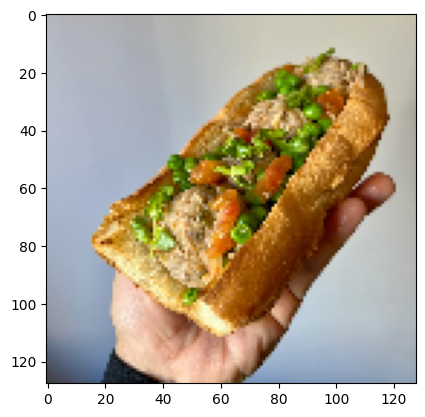

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Món ăn: Bánh mì


In [23]:
from matplotlib import pyplot as plt
from keras.utils import load_img
import numpy as np
path = '/content/homemade-banh-mi-xiu-mai-vietnamese-pork-meatball-hoagie-v0-awo18glq2qqa1.webp'
# Tiên đoán loại s
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img = np.array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)
prediction=np.argmax(model.predict(img))
#Ánh xạ loại tới tên người
class_labels = {v: k for k, v in train_generator.class_indices.items()}
Food = class_labels[prediction]
print(f'Món ăn: {Food}')